In [1]:
#ДЗ 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier


from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import gc

sns.set()
%matplotlib inline

import sys

In [3]:
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)

DISPLAY_MAX_ROWS = 20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', 100)

import warnings
warnings.filterwarnings('ignore')

In [4]:
data_train = pd.read_csv('adult_train.csv', sep=';')
data_train

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data_test = pd.read_csv('adult_test.csv', sep=';')
data_test

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [6]:
print(data_train.isnull().sum())

for col in data_train.columns[data_train.isna().any()].tolist():
    mode_val = data_train[col].mode()[0]
    data_train[col].fillna(mode_val, inplace=True)

for col in ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']:
    data_train[col] = pd.Categorical(data_train[col]).codes

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            583
Target               0
dtype: int64


In [7]:
print(data_test.isnull().sum())

for col in data_test.columns[data_test.isna().any()].tolist():
    mode_val = data_test[col].mode()[0]
    data_test[col].fillna(mode_val, inplace=True)

for col in ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']:
    data_test[col] = pd.Categorical(data_test[col]).codes

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education_Num       0
Martial_Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_week      0
Country           274
Target              0
dtype: int64


In [8]:
x_train = data_train.drop(columns=['Target'])
y_train = data_train['Target']

x_test = data_test.drop(columns=['Target'])
y_test = data_test['Target']

Тестовые данные: 0.7907376696763098
Тренировочные данные: 0.7929424771966463


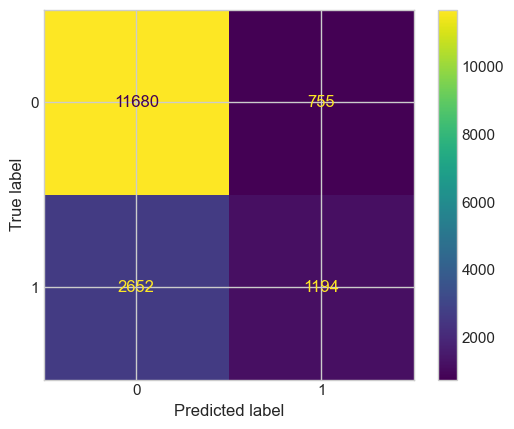

In [10]:
# LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
accuracy = log_reg.score(x_test, y_test)

test_accuracy = log_reg.score(x_test, y_test)
train_accuracy = log_reg.score(x_train, y_train)
print(f'Тестовые данные: {test_accuracy}')
print(f'Тренировочные данные: {train_accuracy}')

y_test_pred = log_reg.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=log_reg.classes_)
display.plot()
plt.show()

Тестовые данные: 0.7758737178306001
Тренировочные данные: 0.836675777770953


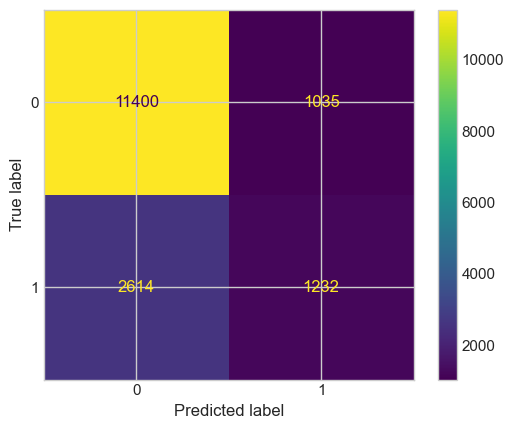

In [11]:
# k-NN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

test_accuracy = knn.score(x_test, y_test)
train_accuracy = knn.score(x_train, y_train)
print(f'Тестовые данные: {test_accuracy}')
print(f'Тренировочные данные: {train_accuracy}')

y_test_pred = knn.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=knn.classes_)
display.plot()
plt.show()

Тестовые данные: 0.7638351452613475
Тренировочные данные: 0.9991093639630233


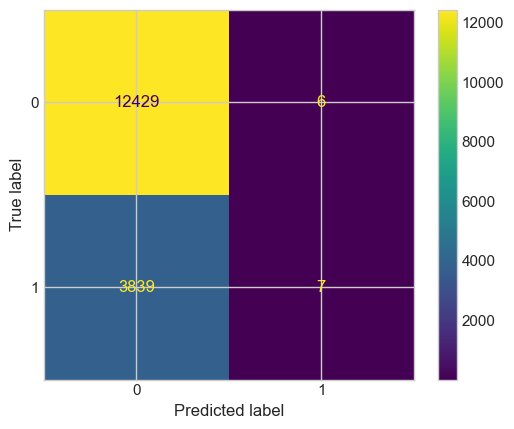

In [13]:
# SVC
halvingGridSearchCV = HalvingGridSearchCV(SVC(), param_grid={'gamma': [0.01, 0.1 ,1],'C': [0.01, 0.1, 1]}, n_jobs=-1)

halvingGridSearchCV.fit(x_train, y_train)
estimator = halvingGridSearchCV.best_estimator_

test_accuracy = estimator.score(x_test, y_test)
train_accuracy = estimator.score(x_train, y_train)
print(f'Тестовые данные: {test_accuracy}')
print(f'Тренировочные данные: {train_accuracy}')

y_test_pred = estimator.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=estimator.classes_)
display.plot()
plt.show()

Тестовые данные: 0.795098581168233
Тренировочные данные: 0.7952765578452751


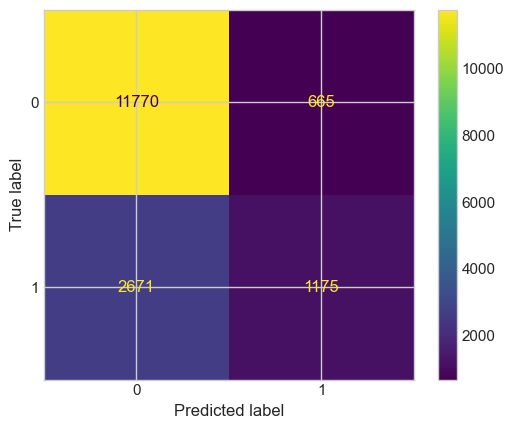

In [14]:
# Naive Bayes
gaussianNB = GaussianNB()
gaussianNB.fit(x_train, y_train)

test_accuracy = gaussianNB.score(x_test, y_test)
train_accuracy = gaussianNB.score(x_train, y_train)
print(f'Тестовые данные: {test_accuracy}')
print(f'Тренировочные данные: {train_accuracy}')

y_test_pred = gaussianNB.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=gaussianNB.classes_)
display.plot()
plt.show()

Тестовые данные: 0.8544315459738345
Тренировочные данные: 0.860876508706735


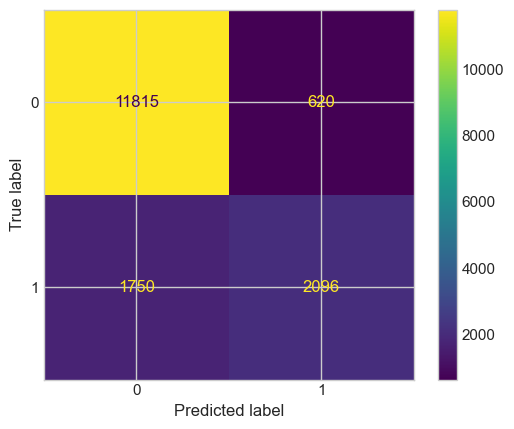

In [15]:
# Decision Tree
gridSearchCV = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': range(2, 11)})
gridSearchCV.fit(x_train, y_train)
estimator = gridSearchCV.best_estimator_

test_accuracy = estimator.score(x_test, y_test)
train_accuracy = estimator.score(x_train, y_train)
print(f'Тестовые данные: {test_accuracy}')
print(f'Тренировочные данные: {train_accuracy}')

y_test_pred = estimator.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=estimator.classes_)
display.plot()
plt.show()

Тестовые данные: 0.8635218966893925
Тренировочные данные: 0.9013543810079543


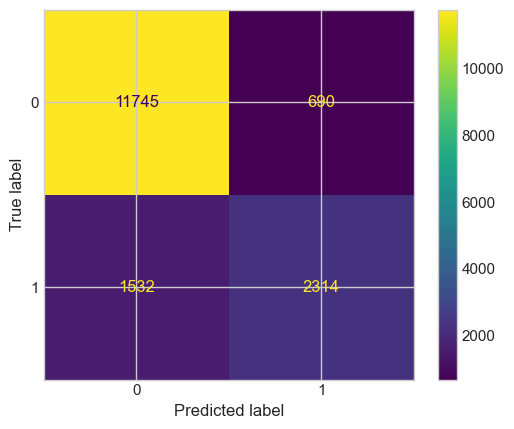

In [16]:
# Random Forest
halvingGridSearchCV = HalvingGridSearchCV(RandomForestClassifier(), param_grid={'max_depth': range(10, 21),'max_features': range(5, 105, 10)})
halvingGridSearchCV.fit(x_train, y_train)
estimator = halvingGridSearchCV.best_estimator_

test_accuracy = estimator.score(x_test, y_test)
train_accuracy = estimator.score(x_train, y_train)
print(f'Тестовые данные: {test_accuracy}')
print(f'Тренировочные данные: {train_accuracy}')

y_test_pred = estimator.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=estimator.classes_)
display.plot()
plt.show()

In [17]:
#ДЗ 2
digits = load_digits()

X = digits.data
Y = digits.target

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

Тестовые данные: 0.9666666666666667
Тренировочные данные: 0.9947609692206941


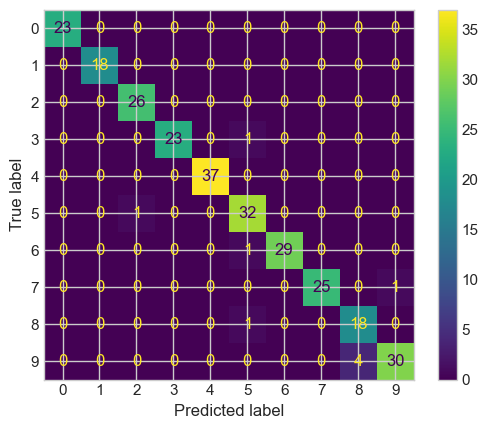

In [18]:
# Logistic Regression
logisticRegression = LogisticRegression(multi_class='ovr', solver='liblinear')
logisticRegression.fit(x_train, y_train)

test_accuracy = logisticRegression.score(x_test, y_test)
train_accuracy = logisticRegression.score(x_train, y_train)
print(f'Тестовые данные: {test_accuracy}')
print(f'Тренировочные данные: {train_accuracy}')

y_test_pred = logisticRegression.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=logisticRegression.classes_)
display.plot()
plt.show()

Тестовые данные: 0.9629629629629629
Тренировочные данные: 1.0


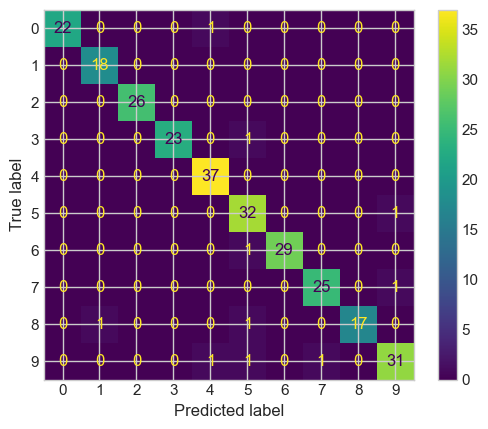

In [19]:
# Random Forest
halvingGridSearchCV = HalvingGridSearchCV(RandomForestClassifier(), param_grid={'max_depth': range(10, 15),'max_features': range(5, 55, 10)})
halvingGridSearchCV.fit(x_train, y_train)

test_accuracy = halvingGridSearchCV.score(x_test, y_test)
train_accuracy = halvingGridSearchCV.score(x_train, y_train)
print(f'Тестовые данные: {test_accuracy}')
print(f'Тренировочные данные: {train_accuracy}')

y_test_pred = halvingGridSearchCV.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=halvingGridSearchCV.classes_)
display.plot()
plt.show()

Тестовые данные: 0.8703703703703703
Тренировочные данные: 1.0


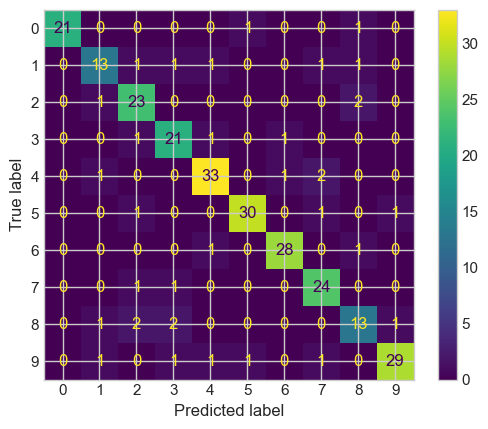

In [20]:
# Decision Tree
halvingGridSearchCV = HalvingGridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': range(2, 30)})
halvingGridSearchCV.fit(x_train, y_train)

test_accuracy = halvingGridSearchCV.best_estimator_.score(x_test, y_test)
train_accuracy = halvingGridSearchCV.best_estimator_.score(x_train, y_train)
print(f'Тестовые данные: {test_accuracy}')
print(f'Тренировочные данные: {train_accuracy}')

y_test_pred = halvingGridSearchCV.best_estimator_.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=halvingGridSearchCV.best_estimator_.classes_)
display.plot()
plt.show()

Тестовые данные: 0.7777777777777778
Тренировочные данные: 1.0


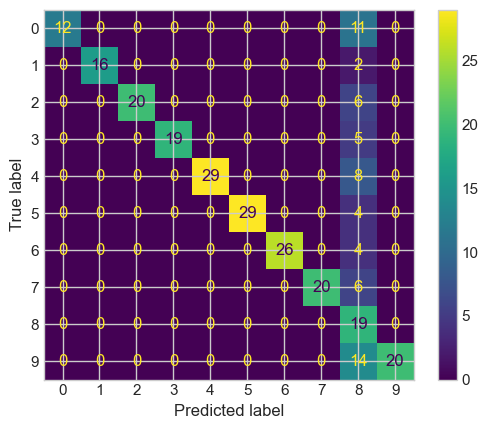

In [21]:
# SVC
halvingGridSearchCV = HalvingGridSearchCV(SVC(), param_grid={'gamma': [0.01, 0.1, 1],'C': [0.01, 0.1, 1]})
halvingGridSearchCV.fit(x_train, y_train)

test_accuracy = halvingGridSearchCV.score(x_test, y_test)
train_accuracy = halvingGridSearchCV.score(x_train, y_train)
print(f'Тестовые данные: {test_accuracy}')
print(f'Тренировочные данные: {train_accuracy}')

y_test_pred = halvingGridSearchCV.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=halvingGridSearchCV.classes_)
display.plot()
plt.show()